In [27]:
import numpy as np 
import matplotlib.pyplot as plt

In [28]:
class SingleLayerNN:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim, 1)
        self.bias = np.random.randn(1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_der(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def f_propagation(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(z)
    
    def loss(self, predictions, targets):
        loss =  -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))
        return loss
    
    def b_propagation(self, inputs, predictions, targets, learning_rate):
        delta_w = learning_rate * np.dot(inputs.T, (targets - predictions))
        delta_b = learning_rate * (targets - predictions)
        return delta_w, delta_b

    def update_weights_and_biases(self, delta_w, delta_b):
        self.weights = self.weights + delta_w
        self.bias = self.bias + delta_b

    def train(self, inputs, targets, epochs=1000, learning_rate=0.01):
        for i in range(epochs):
            predictions = self.f_propagation(inputs)
            loss = self.loss(targets, predictions)
            delta_w, delta_b = self.b_propagation(inputs, predictions, targets, learning_rate)
            self.update_weights_and_biases(delta_w, delta_b)
            if i % 100 == 0:
                print('Iteration: '+str(i)+', Loss:'+str(loss))
    
    def predict(self, x):
        predictions = self.f_propagation(x)
        return np.round(predictions)
    
        

In [29]:
n_samples = 100
features_class_0 = np.random.randn(n_samples , 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples , 2) + [-2, 2] # Class 1
inputs = np.vstack((features_class_0, features_class_1))
targets = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

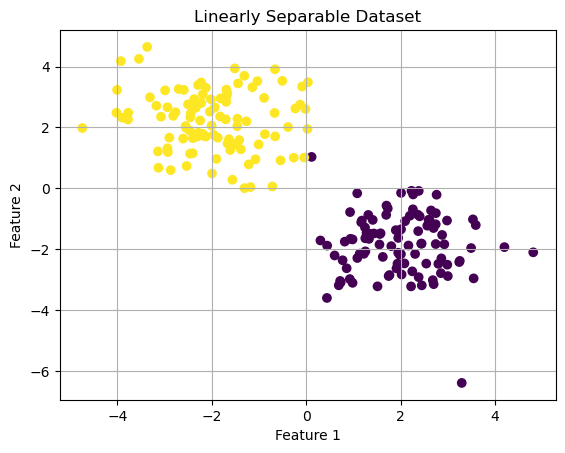

In [41]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, cmap='viridis')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [42]:
model = SingleLayerNN(input_dim=2)
model.train(inputs, targets, epochs=100, learning_rate=0.1)

Iteration: 0, Loss:inf


/tmp/ipykernel_58979/2267244741.py:18: RuntimeWarning: divide by zero encountered in log
  loss =  -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))
/tmp/ipykernel_58979/2267244741.py:18: RuntimeWarning: invalid value encountered in multiply
  loss =  -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))


In [45]:
predictions = model.predict(inputs)
accuracy = np.mean(targets == predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5475


$w = w + (η(y − {\^y})x)$  
$b = b + (η(y − {\^y}))$